# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [1]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
%matplotlib inline

## Challenge 1

#### The data we will use in this challenge is:

In [3]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

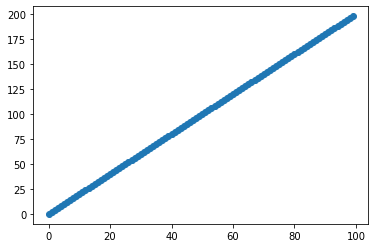

In [4]:
# Method 1
plt.scatter(x,y)

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

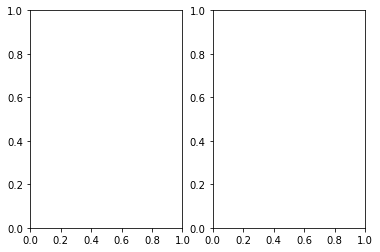

In [5]:
# Method 2
fig, ax = plt.subplots(nrows=1, ncols=2)

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

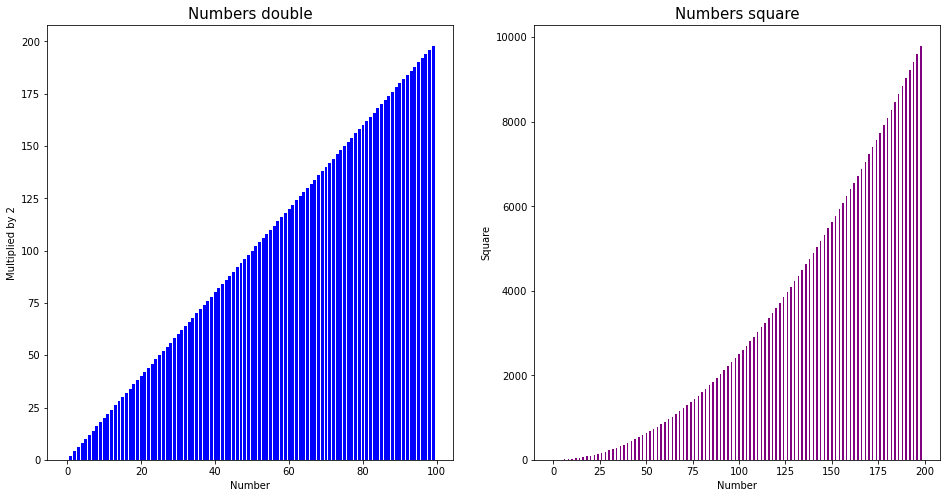

In [6]:
# resizing
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,8))

# adding the graphs and changing color
axes[0].bar(x,y, color='blue')
axes[1].bar(y,z, color='purple')

# adding titles and changing fontsize
axes[0].set_title('Numbers double', fontsize=15)
axes[1].set_title('Numbers square', fontsize=15)

# adding labels
axes[0].set_xlabel('Number')
axes[0].set_ylabel('Multiplied by 2')

axes[1].set_xlabel('Number')
axes[1].set_ylabel('Square')

# showing the graph
plt.show()

#### Now you will have to plot both $y=x^2$ and $y=e^x$ in the same plot. Create two subplots and use a normal scale in the first one and a logarithmic scale in the second one.
**Hint**: Use `set_xscale` and `set_yscale`.

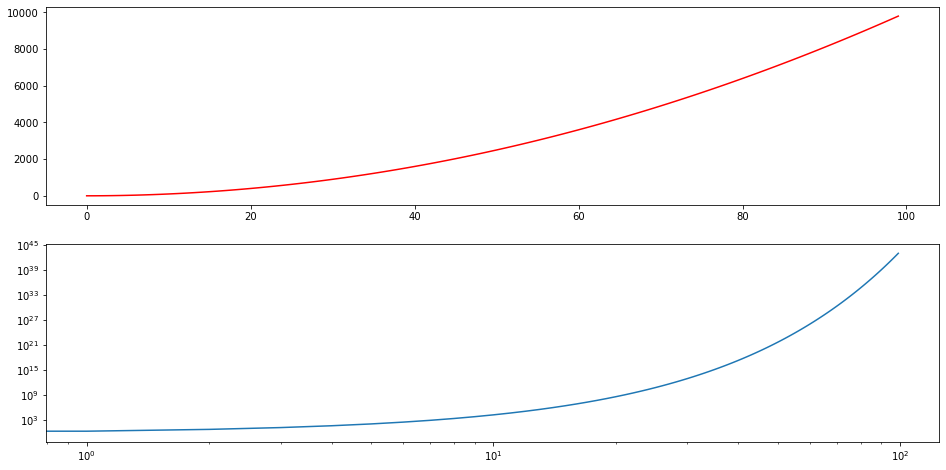

In [7]:
# creating the figure
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(16,8))

# functions
def square(x):
    return x**2

def e_by_x(x):
    return np.exp(1)**x

# creating linear graph
ax[0].plot(square(x), color='red')
ax[0].set_yscale('linear')


# crating log graph
ax[1].plot(e_by_x(x))
ax[1].set_xscale('log')
ax[1].set_yscale('log')

# Options of scale: 'linear', 'log', 'symlog', 'logit', 'function', 'functionlog'

#### As a bonus challenge, try to add a legend to the plot.

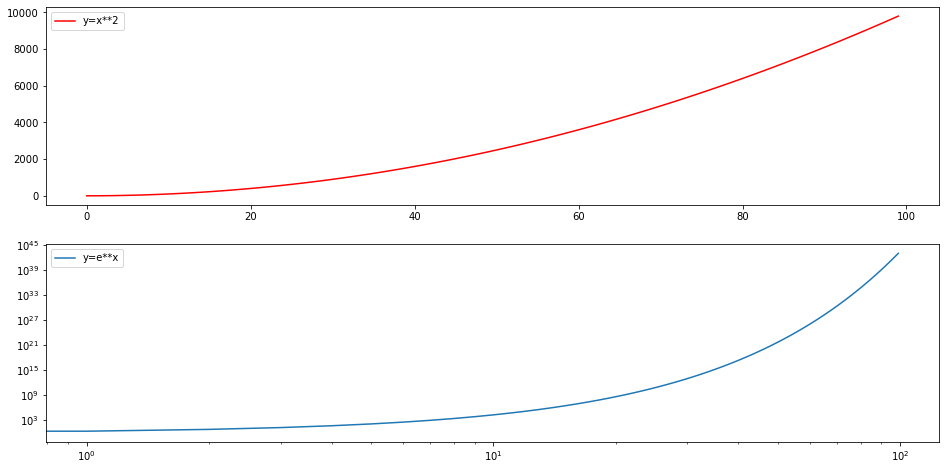

In [8]:
# creating the figure
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(16,8))

# functions
def square(x):
    return x**2

def e_by_x(x):
    return np.exp(1)**x

# creating linear graph
ax[0].plot(square(x), color='red', label='y=x**2')
ax[0].set_yscale('linear')


# crating log graph
ax[1].plot(e_by_x(x), label='y=e**x')
ax[1].set_xscale('log')
ax[1].set_yscale('log')

# adding legend
ax[0].legend()
ax[1].legend()

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [9]:
# your code here
df_fitbit = pd.read_csv('../data/fitbit2.csv')
df_fitbit

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,2016-05-03,3796,18588,14.13,16,599.000,275,49,79,236,...,8.779972,Tuesday,1.0,1,6.283333,91.951220,5.233333,90.229885,May,5
363,2016-05-04,3525,16382,12.39,16,684.000,333,10,55,2075,...,7.698787,Wednesday,2.0,1,6.766667,95.081967,6.283333,91.951220,May,5
364,2016-05-05,3649,21913,16.40,19,701.000,287,29,90,2249,...,10.190484,Thursday,3.0,1,4.666667,88.888889,6.766667,95.081967,May,5
365,2016-05-06,3539,19023,14.79,15,575.000,298,8,85,2112,...,9.190077,Friday,4.0,1,6.166667,89.805825,4.666667,88.888889,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

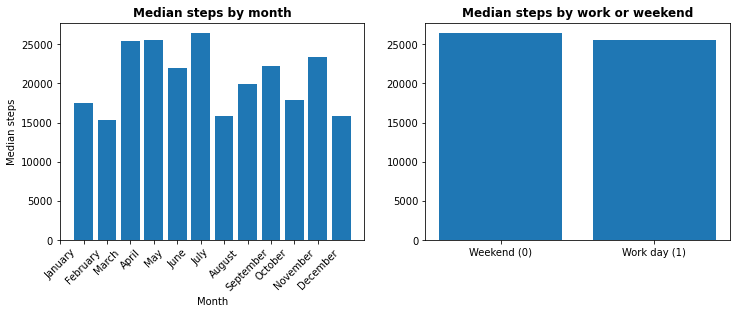

In [10]:
# create figure
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(12,4))

# MEDIAN STEPS BY MONTH_ENCODED
#title
axes[0].set_title('Median steps by month', fontdict={'fontsize': 12, 'fontweight': 'bold'})

# graph steps by month
axes[0].bar(df_fitbit['Months_encoded'], df_fitbit['Steps'])
axes[0].set(xlabel='Month', ylabel='Median steps')

# changing name of values axis.
my_xticks = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.sca(axes[0])
plt.xticks(range(12), my_xticks, rotation=45)



# MEDIAN STEPS BY WORK_OR_WEEKEND
# title
axes[1].set_title('Median steps by work or weekend', fontdict={'fontsize': 12, 'fontweight': 'bold'})

# graph
axes[1].bar(df_fitbit['Work_or_Weekend'], df_fitbit['Steps'])

# changing name axis.
my_yticks = ['Weekend (0)', 'Work day (1)']
plt.sca(axes[1])
plt.xticks(range(2), my_yticks)


plt.show()

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

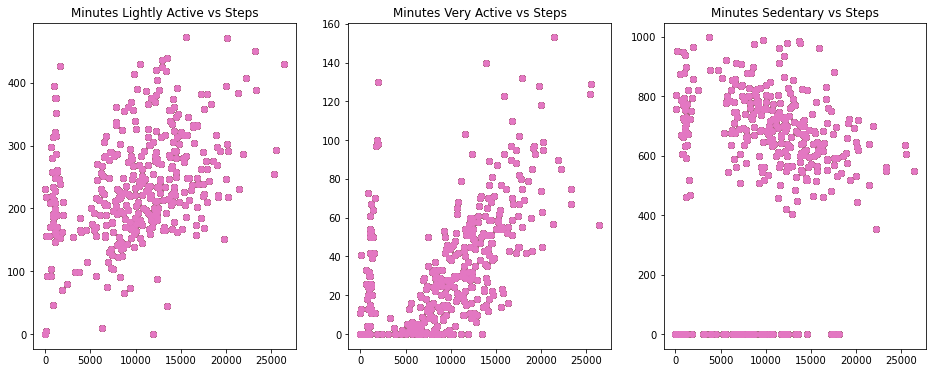

In [11]:
# create figure
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(16,6))

# titles
axes[0].set_title('Minutes Lightly Active vs Steps')
axes[1].set_title('Minutes Very Active vs Steps')
axes[2].set_title('Minutes Sedentary vs Steps')

# for loop
for i in df_fitbit['Steps']:
    axes[0].scatter(df_fitbit['Steps'], df_fitbit['Minutes Lightly Active'])
    axes[1].scatter(df_fitbit['Steps'], df_fitbit['Minutes Very Active'])
    axes[2].scatter(df_fitbit['Steps'], df_fitbit['Minutes Sedentary'])

# do i really need a loop?
    
plt.show()

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [12]:
# your code here
titanic = pd.read_csv('../data/titanic.csv')
titanic

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,U0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,29.513190,0,0,A.5. 3236,8.0500,U0,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,U0,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,29.513190,0,0,359309,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [13]:
# exploting the data types.
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [14]:
# NUMERICAL VARIABLES
titanic.select_dtypes(include=['int64', 'float64'])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


In [15]:
# CATEGORICAL VARIABLES
titanic.select_dtypes(include=['object'])

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [16]:
# your code here
fig = plt.figure(figsize=(12,6))
plt.style.use('classic')

<Figure size 864x432 with 0 Axes>

#### Use the right visulalization to show the distribution of column `Age`.

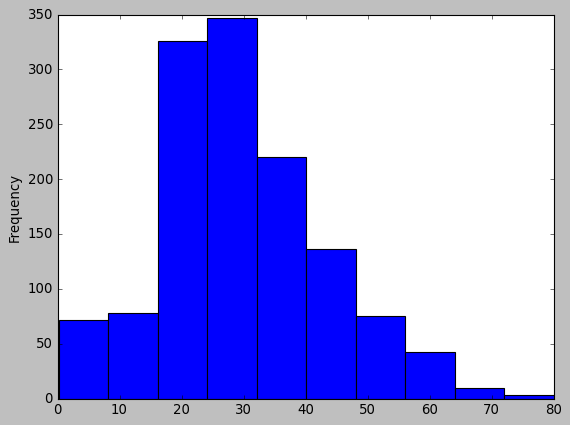

In [17]:
ax = titanic['Age'].plot(kind='hist')

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

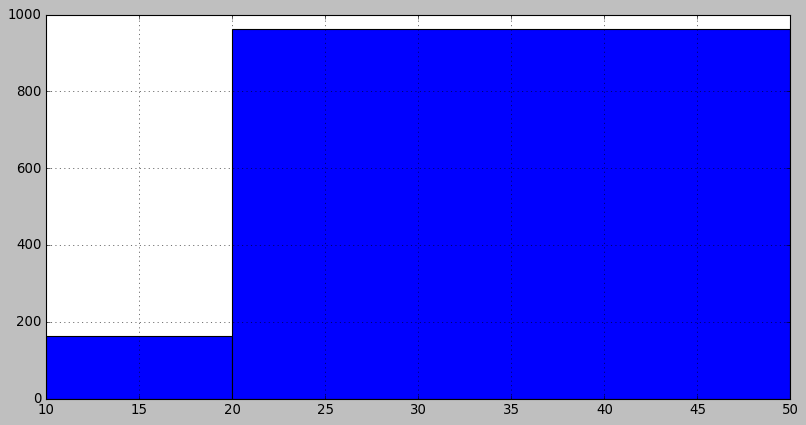

In [18]:
fig = plt.figure(figsize=(12,6))
ax = titanic['Age'].hist(bins=(10,20,50))

#### How does the bin size affect your plot?

In [19]:
"""
I have the number of people between 10 and 20 years in one bin and people between 20 and 50 in other big bin.
"""

'\nI have the number of people between 10 and 20 years in one bin and people between 20 and 50 in other big bin.\n'

#### Use seaborn to show the distribution of column `Age`.

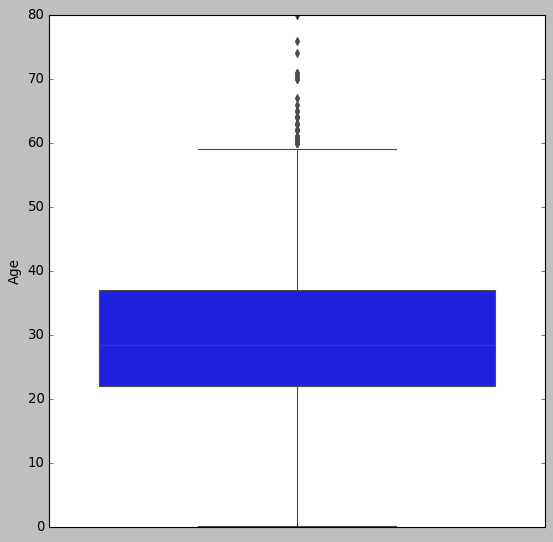

In [20]:
fig = plt.figure(figsize=(8,8))
ax = sns.boxplot(y='Age', data=titanic)

# Titanic passengers's age were between 20 and 40 years old mainly.

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

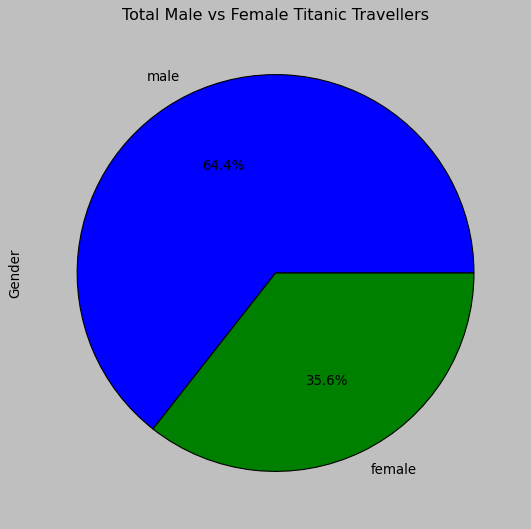

In [21]:
# Method 1 - matplotlib
# creating the figure.
fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(8,8))

# counting total males and females.
gender_counts = titanic['Gender'].value_counts()

# creating the plot and adding some extra information.
ax = gender_counts.plot.pie(autopct="%.1f%%").set_title('Total Male vs Female Titanic Travellers')

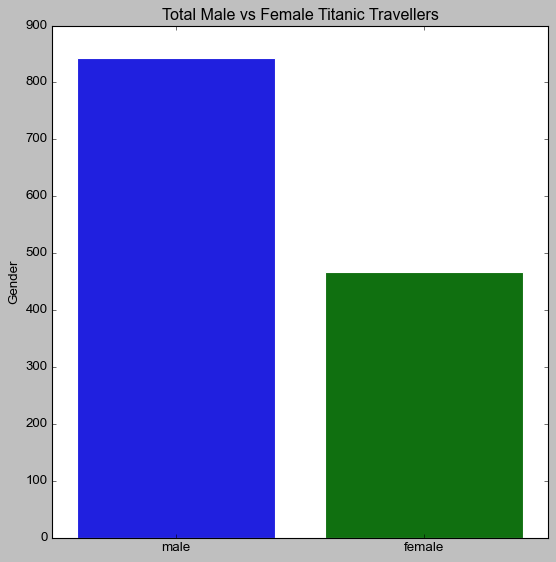

In [22]:
# Method 2 - seaborn
# creating the figure. 
fig = plt.subplots(figsize=(8,8))

#changing style
sns.set_style("ticks")

# counting numbers of people of each gender.
gender_counts = titanic['Gender'].value_counts()

# creating the plot using seaborn.
ax = sns.barplot(data=titanic, y=gender_counts, x=gender_counts.index)

# adding extra information
ax.set_title('Total Male vs Female Titanic Travellers')

plt.show()

#### Use the right plot to visualize the column `Pclass`.

In [23]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


In [24]:
passengers_by_class = titanic['Pclass'].value_counts()

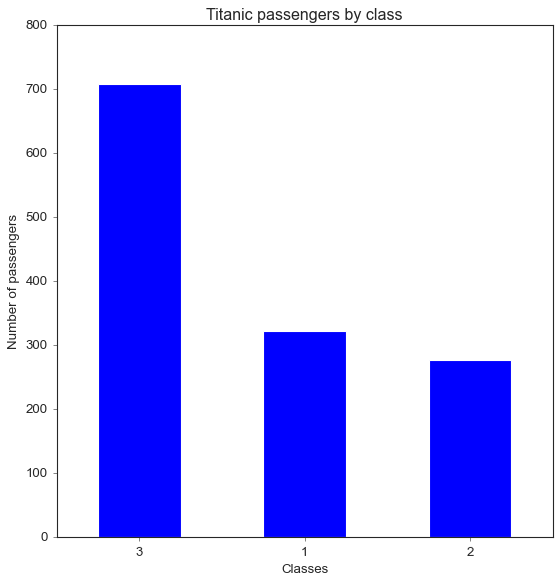

In [25]:
# your code here
# creating the figure.
fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(8,8))

# creating the plot and adding some extra information.
ax = passengers_by_class.plot.bar()

# changing labels and title names
ax.set(xlabel='Classes', ylabel='Number of passengers', title='Titanic passengers by class')

# changing labels rotation
labels = ax.get_xticklabels()
plt.setp(labels, rotation=1)

plt.show()

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

<AxesSubplot:>

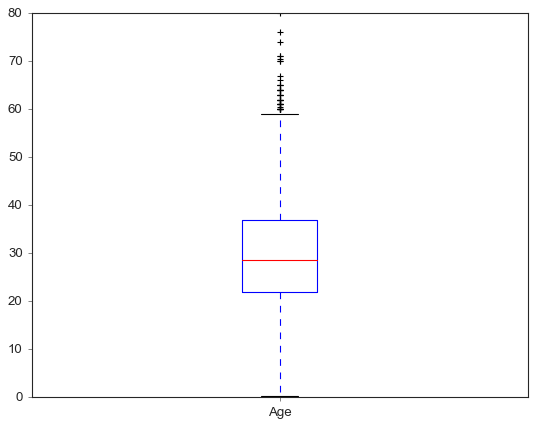

In [26]:
titanic['Age'].plot(kind='box')

In [27]:
"""
I will use a box plot because we can see the median, the max, the min, the outliers, the values of the majority of the data and where are the 25 and 75 quantiles.
"""

'\nI will use a box plot because we can see the median, the max, the min, the outliers, the values of the majority of the data and where are the 25 and 75 quantiles.\n'

#### What does the last plot tell you about the feature `Age`?

In [28]:
"""
In this case:
- the median is near to 30 years old.
- te maximum age is near 80 years old.
- the outliers are between 60 and 80 years old, but I would not delete them because are correct values.
- The majotiry of the passengers are between 20 and 40 years old. This ages correspond with the 25 and 75 quantile also.

In order to see if I am correct, I will check it using pandas:
"""

'\nIn this case:\n- the median is near to 30 years old.\n- te maximum age is near 80 years old.\n- the outliers are between 60 and 80 years old, but I would not delete them because are correct values.\n- The majotiry of the passengers are between 20 and 40 years old. This ages correspond with the 25 and 75 quantile also.\n\nIn order to see if I am correct, I will check it using pandas:\n'

In [29]:
titanic['Age'].describe().to_frame()

,Age
count,1309.000000
mean,29.879186
std,13.448335
min,0.170000
25%,22.000000
50%,28.500000
75%,37.000000
max,80.000000


#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

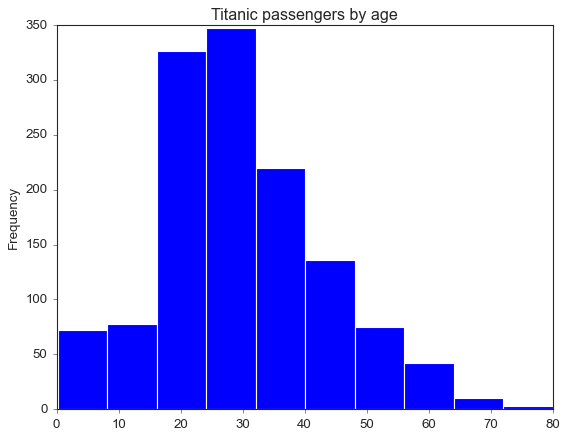

In [30]:
# To see the distribution I will use a histogram.

titanic['Age'].plot(kind='hist', title='Titanic passengers by age');

#### What additional information does the last plot provide about feature `Age`?

In [31]:
"""
Thanks to the histogram, I can see that 30s years old are the most common in Titanic's passengers, with a total amount near to 350 people. 
This group is followed by the 20s group and the 40s.
There are more or less the same quantity of children between 0 and 10 years old than teenagers between 10 and 20 years old.
"""

"\nThanks to the histogram, I can see that 30s years old are the most common in Titanic's passengers, with a total amount near to 350 people. \nThis group is followed by the 20s group and the 40s.\nThere are more or less the same quantity of children between 0 and 10 years old than teenagers between 10 and 20 years old.\n"

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

In [32]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


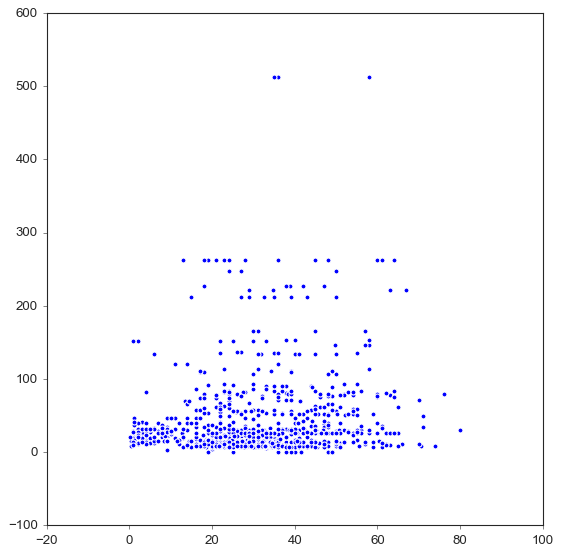

In [33]:
# Method 1 - matplotlib
# creating the figure
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(8,8))

# adding graphs
ax.scatter(titanic['Age'], titanic['Fare']);

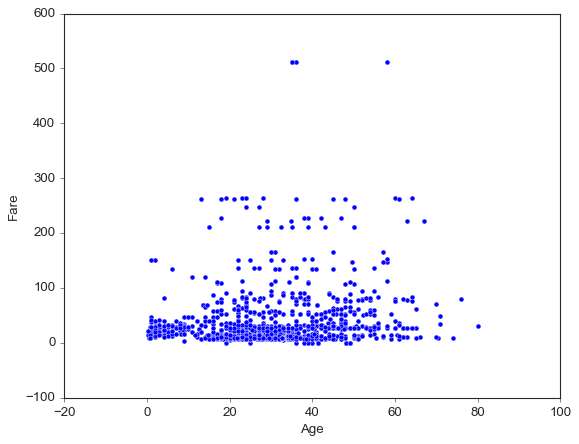

In [78]:
# Method 2 - seaborn
sns.scatterplot(data=titanic, x='Age', y='Fare');

In [35]:
"""
It's look like that there aren't a clear linear relationship beatween age and fare. The most of the tickets are between 30-40$ no matter the age (probably for class 3).
"""

"\nIt's look like that there aren't a clear linear relationship beatween age and fare. The most of the tickets are between 30-40$ no matter the age (probably for class 3).\n"

#### Plot the correlation matrix using seaborn.

<AxesSubplot:>

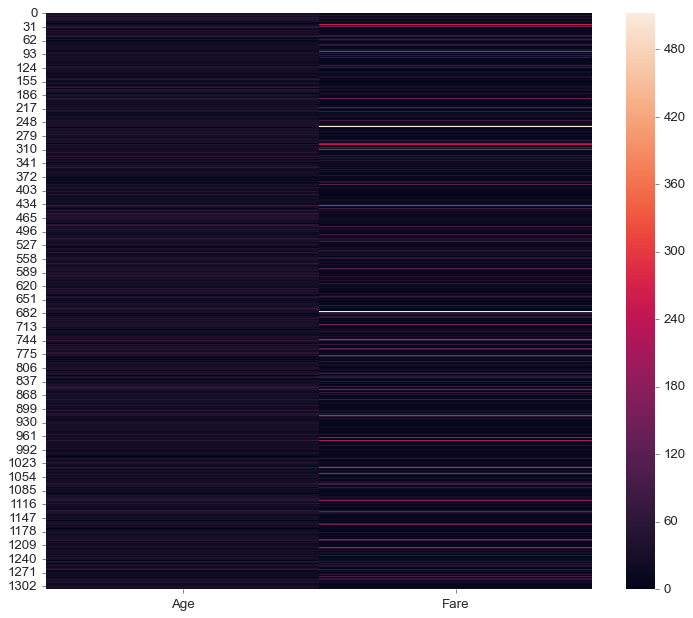

In [110]:
# adding the figure
f, ax = plt.subplots(figsize=(11,9))

# I tried:
#df_age_fare = titanic[['Age', 'Fare']]
#pivot_table = pd.pivot_table(df_age_fare, index=['Age'], columns=['Fare'])

# but only received a real result with this:
sns.heatmap(titanic[['Age', 'Fare']])

#### What are the most correlated features?

In [111]:
"""
Probably is not ok because is not clear, but I need to continue with Tableau lab. Please, could we talk about this kind of grapsh in class?
"""

'\nProbably is not ok because is not clear, but I need to continue with Tableau lab. Please, could we talk about this kind of grapsh in class?\n'

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

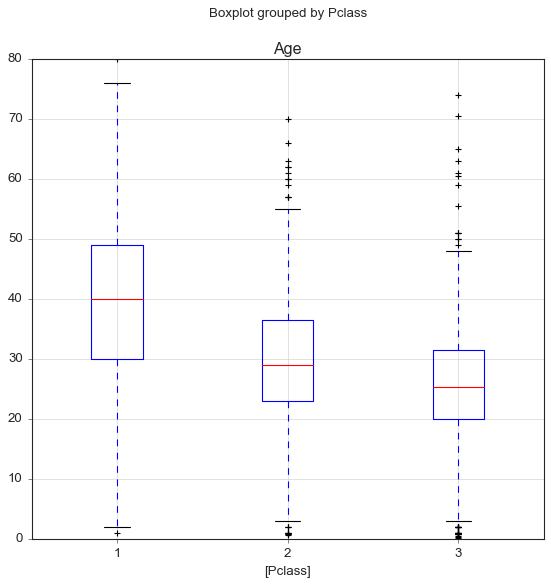

In [49]:
# generating the Age information by Passenger class.
ax = titanic.boxplot(column=['Age'], by=['Pclass'], figsize=(8,8))

In [66]:
"""
As a conclusion, we can see clearly that passengers of class 1 are older than class 2 and 3.
"""

'\nAs a conclusion, we can see clearly that passengers of class 1 are older than class 2 and 3.\n'

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

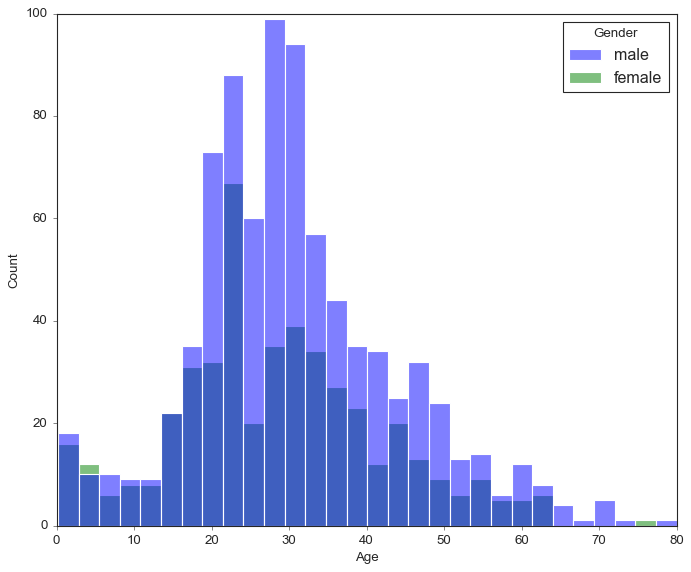

In [63]:
# first we create a figure.
fig = plt.figure(figsize=(10,8))

# the graphic
ax = sns.histplot(data=titanic, x='Age', hue='Gender')

plt.show()

In [65]:
"""
In this plot we can see the distribution of the age by gender of the Titanic's passengers. 
The first conclusion is that there are more man than woman almost in all the agre ranges. 
The difference is specially great in the 18-40 age range.
"""

"\nIn this plot we can see the distribution of the age by gender of the Titanic's passengers. \nThe first conclusion is that there are more man than woman almost in all the agre ranges. \nThe difference is specially great in the 18-40 age range.\n"